In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ppo_data = np.load('eval_results/ppo/evaluations.npz')
a2c_data = np.load('eval_results/a2c/evaluations.npz')
dqn_data = np.load('eval_results/dqn/evaluations.npz')

In [15]:
ppo_df = pd.read_csv('test_logs/ppo.csv')
a2c_df = pd.read_csv('test_logs/a2c.csv')
dqn_df = pd.read_csv('test_logs/dqn.csv')

In [5]:
# ppo_data = pd.read_csv('monitor_logs/ppo/eval.monitor.csv', skiprows=1)
# dqn_data = 

In [9]:
df["rank"] = df.groupby("current_date")["t"].rank('dense')

Text(0.5, 1.0, 'Average Evaluation Episode Length')

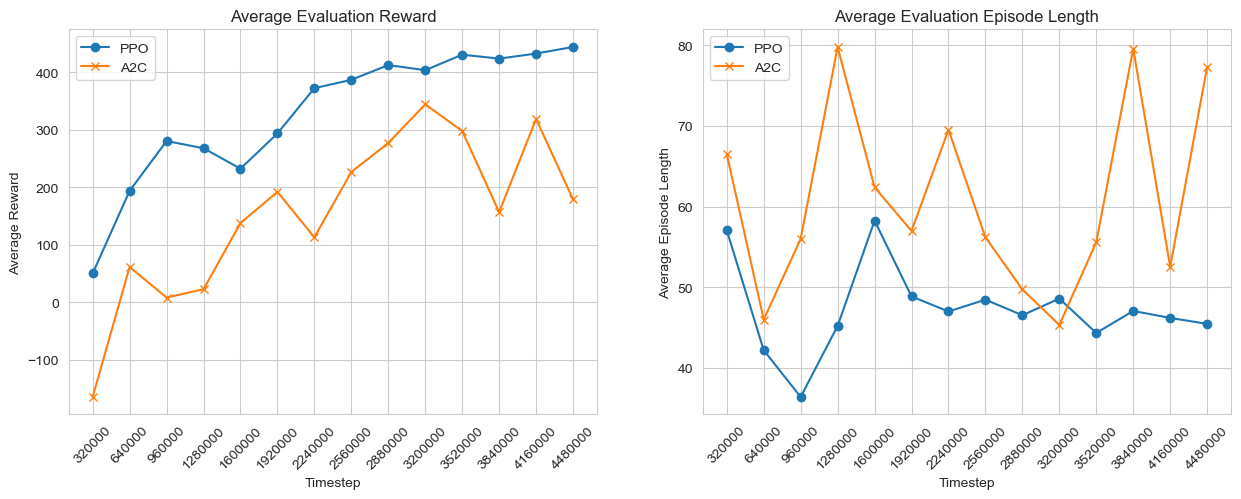

In [13]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].ticklabel_format(useOffset=False)
axs[0].plot(ppo_data["timesteps"], ppo_data["results"].mean(axis=1), label="PPO", marker='o')
axs[0].plot(a2c_data["timesteps"], a2c_data["results"].mean(axis=1), label="A2C", marker='x')
axs[0].set_xticks(ppo_data["timesteps"], labels=ppo_data["timesteps"], rotation=45)
axs[0].set_xlabel("Timestep")
axs[0].set_ylabel("Average Reward")
axs[0].legend()
axs[0].set_title("Average Evaluation Reward")

axs[1].ticklabel_format(useOffset=False)
axs[1].plot(ppo_data["timesteps"], ppo_data["ep_lengths"].mean(axis=1), label="PPO", marker='o')
axs[1].plot(a2c_data["timesteps"], a2c_data["ep_lengths"].mean(axis=1), label="A2C", marker='x')
axs[1].set_xticks(ppo_data["timesteps"], labels=ppo_data["timesteps"], rotation=45)
axs[1].set_xlabel("Timestep")
axs[1].set_ylabel("Average Episode Length")
axs[1].legend()
axs[1].set_title("Average Evaluation Episode Length")